## Task: Train a logistic regression classifier to predict survival of passengers in titanic dataset

You are provided with code to download and load titanic dataset in the form of a csv

In the dataset, each row represents information about the passengers of titanic, Like their name, gender, class etc(See the dataframe below for more info).

The target column is 'Survived' which tells us whether this particular passenger sirvived or not

Use any of all the other columns as the input features (You can choose to drop the columns you see are not worth keeping).

Your task is to train a logistic regression model which takes the input featues (make sure to not accidentaly feed the 'Survived' column to the model as input) and predicts the whether a passenger with these features would survive or not.

Make sure to put emphasis on code quality and to include a way to judge how good your model is performing on **un-seen data (untrained data)**.

As a bonus, see if you can figure out which feature is most likely to affect the survivability of a passenger.

In [ ]:
from IPython.display import clear_output

In [ ]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install gdown

clear_output()

In [ ]:
!gdown 18YfCgT3Rk7uYWrUzgjb2UR3Nyo9Z68bK  # Download the csv file.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
titanic_data = pd.read_csv('titanic.csv')

In [26]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
data = titanic_data

In [28]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Solving it with SKLearn

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import plotly.graph_objects as go

In [30]:
# 1 - Understand the data

unique_values = set(data["Embarked"])
print("Unique values of embarked column: ", unique_values)

print("\nembarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton")
print("nan for not recorded")

print("\nSibSp – Number of siblings and spouses on board")
print("Parch – Number of parents and children on board")

print("\nDimensions of the features: ", data.shape)

Unique values of embarked column:  {nan, 'Q', 'S', 'C'}

embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton
nan for not recorded

SibSp – Number of siblings and spouses on board
Parch – Number of parents and children on board

Dimensions of the features:  (891, 12)


In [31]:
# 2 – Drop columns by intuition

data = data.drop(columns=["Name", # just the name, no strings attatched to it
                          "Ticket", # number / name of ticket does not change outcome
                          "Embarked", # port of boarding does not count ("most likely rooms were booked before")
                          "Fare", # because it is just a duplicate of passenger class (but would be more accurate, since some first class rooms were more expensive then others for example)
                          "PassengerId", # because this is not related to the survivablility (also dataframe index is equal)
                          ])

In [32]:
# 3 – Check for data completeness

nan_count = data["Pclass"].isnull().sum()
print("Number of NaN values in pclass:", nan_count)

nan_count = data["Age"].isnull().sum()
print("Number of NaN values in age:", nan_count)

nan_count = data["Sex"].isnull().sum()
print("Number of NaN values in sex:", nan_count)

nan_count = data["SibSp"].isnull().sum()
print("Number of NaN values in SipSp:", nan_count)

nan_count = data["Parch"].isnull().sum()
print("Number of NaN values in parch:", nan_count)

nan_count = data["Cabin"].isnull().sum()
print("Number of NaN values in cabin:", nan_count)

Number of NaN values in pclass: 0
Number of NaN values in age: 177
Number of NaN values in sex: 0
Number of NaN values in SipSp: 0
Number of NaN values in parch: 0
Number of NaN values in cabin: 687


In [33]:
# 4 – Drop columns because of too many missing values

data = data.drop(columns=["Cabin"])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [34]:
# 5 - Remove entries with missing ages

print("Shape before:", data.shape)

# Remove entries where "age" is missing
data = data.dropna(subset=["Age"])

print("Shape after: ", data.shape)

Shape before: (891, 6)
Shape after:  (714, 6)


In [35]:
# 6 – Convert categorical columns to numeric (One Hot Encoding)

data = pd.get_dummies(data, columns=['Sex'], drop_first=True)

data.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_male
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


In [36]:
# 7 – Split data into feature  matrix (X) and target (y)

X = data.drop(columns=['Survived'])
y = data['Survived']

In [37]:
# 8 – Normalize Data

columns_to_scale = ["Age", "SibSp", "Parch"]

# Initialize Scaler
scaler = StandardScaler()

# Fit and transform the continouous data columns
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

# Sanity check if it worked as expected
X.head()

,Pclass,Age,SibSp,Parch,Sex_male
0,3,-0.530377,0.524570,-0.505895,1
1,1,0.571831,0.524570,-0.505895,0
2,3,-0.254825,-0.551703,-0.505895,0
3,1,0.365167,0.524570,-0.505895,0
4,3,0.365167,-0.551703,-0.505895,1


In [38]:
# 9 - Create subset for training and seperate test data later

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7331)

print("Train dataset shape: ", X_train.shape)
print("Test dataset shape", X_test.shape)

Train dataset shape:  (571, 5)
Test dataset shape (143, 5)


In [39]:
# 10 – Create and train the logistic regression model

model = LogisticRegression(verbose=1, max_iter=1000)
model.fit(X_train, y_train)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  3.55517D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     11     14      1     0     0   3.370D-05   4.626D-01
  F =  0.46255196963383055     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


LogisticRegression(max_iter=1000, verbose=1)

In [40]:
# 11 – Use the trained model on seperate test data

y_pred = model.predict(X_test)

In [41]:
# 12 – Print evaluation metrics

labels = ["Died", "Survived"]
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=labels))

Classification Report:
               precision    recall  f1-score   support

        Died       0.80      0.94      0.86        85
    Survived       0.88      0.66      0.75        58

    accuracy                           0.83       143
   macro avg       0.84      0.80      0.81       143
weighted avg       0.83      0.83      0.82       143



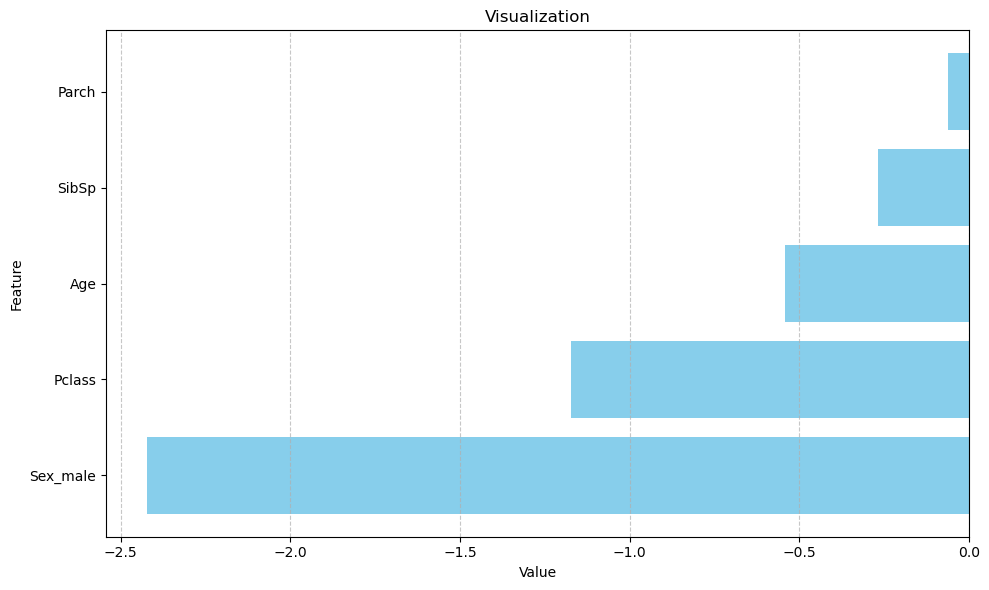

In [42]:
# 13 – Visualize model coefs

feature_coef = pd.Series(model.coef_[0], index=X.columns).sort_values(ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))

# Plot horizontal bar plot
plt.barh(feature_coef.index, feature_coef.values, color='skyblue')

# Add labels and title
plt.title('Visualization')
plt.xlabel('Value')
plt.ylabel('Feature')

# Add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

# Interpretation: Most important survibility feature
###  The biggest influence on if you survive or not is the gender. This is represented with the worsed odds when looking at the above coefs visualization

In [43]:
# 14 - Correctly / Acutal Value Visualization

# Create the Plotly scatter plot
fig = go.Figure()

# Scatter plot for actual values
fig.add_trace(go.Scatter(
    x= np.arange(len(y_test)),
    y=y_test,
    mode='markers',
    name='Actual Values',
    marker=dict(color='blue', opacity=0.5, size=12),
    hovertemplate='Index: %{x}<br>Actual: %{y}<extra></extra>',
    hoverinfo='text'
))

# Scatter plot for predicted values
fig.add_trace(go.Scatter(
    x=np.arange(len(y_test)),
    y=y_pred,
    mode='markers',
    name='Predicted Values',
    marker=dict(color='red', opacity=0.5, size=8),
    hovertemplate='Index: %{x}<br>Predicted: %{y}<extra></extra>',
    hoverinfo='text'
))

# Add labels and title
fig.update_layout(
    title='Actual vs Predicted Values',
    xaxis_title='Index',
    yaxis_title='Value',
    legend_title='Legend',

)

# Show the plot
fig.show()

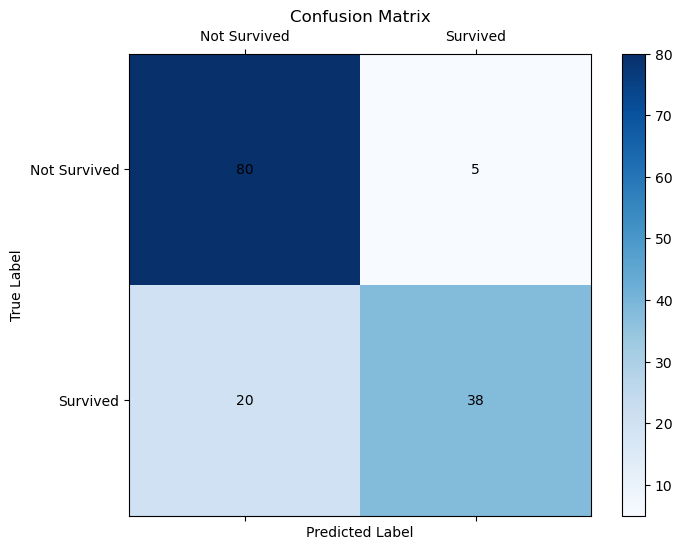

In [44]:
# 15 - Confusion Matrix Visualization

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(cm, cmap='Blues')

# Add color bar
plt.colorbar(cax)

# Add labels, title and axes ticks
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

# Add labels to each cell in the matrix
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f'{val}', ha='center', va='center') 

# Set the tick labels
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Not Survived', 'Survived'])
ax.set_yticklabels(['Not Survived', 'Survived'])

plt.show()

In [45]:
# 16 – Sanity check to see if correctly predicted and test data is the same as in the confusion matrix

matching_survival_count = np.sum((y_test == 1) & (y_pred == 1))
print(f"Number of correct survival predictions: {matching_survival_count}")

Number of correct survival predictions: 38


# Doing it on my own

In [51]:
# 10 – Define needed funtcions for own implementation

def sigmoid(z):
    return 1/(1+np.exp(-z))


def get_loss(yhat, y):
    return np.mean(-y*np.log(yhat) - (1-y)*np.log(1-yhat))
    
def log_reg_gradient_descent(X,y, learning_rate, n_iterations):
    theta = np.random.randn(X.shape[1],1)
    for i in range(num_epochs):
        #forward pass
        z = X @ theta
        yhat = sigmoid(z)
        l = get_loss(yhat, y)

        #backward pass
        dtheta = X.T @ (yhat - y)


        #optimization
        theta = theta - lr*dtheta    
    return theta

In [55]:
# 11 – Create and train own model

num_epochs = 1000
lr = 0.001

result = log_reg_gradient_descent(X_train, y_train, lr, num_epochs)

print(result)

/opt/conda/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



               0    1    2    3    4    9    10   11   12   13   ...  879  \
Pclass   -4.480894  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
Age      -0.390220  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
SibSp     0.082432  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
Parch    -0.148152  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   
Sex_male -1.836398  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN   

          880  881  882  883  884  885  886  887  890  
Pclass    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
Age       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
SibSp     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
Parch     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
Sex_male  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 571 columns]
